# ICESat-2 v7: NASA's First Cloud-Optimized HDF5 dataset**.

**NSIDC UWG, June 2025.**

**Presenter: Luis Lopez**

This notebook showcases the outcomes of a two-year collaborative effort by the community to overcome persistent performance limitations of HDF in cloud environments. These advancements pave the way for more efficient and scalable analysis of NASA’s scientific data archives in the cloud. 

This work not only addresses long-standing performance challenges for HDF in the cloud but also contributes to broader best practices for scientific data management. The insights gained have informed guidelines for other data producers, as documented in the [Cloud-Native Geospatial Guide](https://guide.cloudnativegeo.org/cloud-optimized-netcdf4-hdf5/). Additionally, these advancements are being leveraged by upcoming NASA missions, such as NISAR, ensuring more efficient and scalable cloud-based analysis of large-scale scientific datasets.


Cloud-optimized HDF5 improvements are language-agnostic, they are accessible through the HDF5 C bindings (C, Matlab, R) so they are not limited to Python.


**Luis A. Lopez¹, Andrew P. Barrett¹, Amy Steiker¹, Lisa Kaser¹, Aleksandar Jelenak², Jeffrey E. Lee³**

---

¹ National Snow and Ice Data Center, University of Colorado, Boulder  
² The HDF Group  
³ NASA / KBR

** ASF published an OPERA product in cloud optmized HDF5 format 2 weeks ago.

In [1]:
import xarray as xr
import earthaccess
import h5py

auth = earthaccess.login()

for library in (xr, h5py, earthaccess):
    print(f'{library.__name__} v{library.__version__}')

xarray v2025.6.1
h5py v3.14.0
earthaccess v0.14.0


## 1. Search and access with earthaccess and xarray

### ATL03 V6

In [2]:
v6_granule = earthaccess.search_data(
    short_name="ATL03",
    version="006",
    cloud_hosted=True,
    temporal=("2018-11","2018-12"),
    granule_name="*_08110112_*",
    count=1
)[0]
v6_granule

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L2A Global Geolocated Photon Data V006'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -69.61872, 'Latitude': -49.95128}, {'Longitude': -69.79713, 'Latitude': -49.96256}, {'Longitude': -69.69184, 'Latitude': -50.65343}, {'Longitude': -68.29856, 'Latitude': -58.83718}, {'Longitude': -67.88243, 'Latitude': -60.90163}, {'Longitude': -66.39798, 'Latitude': -66.93261}, {'Longitude': -66.22196, 'Latitude': -67.52809}, {'Longitude': -66.02903, 'Latitude': -68.15649}, {'Longitude': -65.7854, 'Latitude': -68.91098}, {'Longitude': -65.58881, 'Latitude': -69.49859}, {'Longitude': -65.35432, 'Latitude': -70.15966}, {'Longitude': -65.10366, 'Latitude': -70.82911}, {'Longitude': -64.81972, 'Latitude': -71.54478}, {'Longitude': -64.52121, 'Latitude': -72.25158}, {'Longitude': -64.23384, 'Latitude': -72.89071}, {'Longitude': -63.95121, 'Latitude': -73.4761}, {'Longitude': -63.59331, 'Latitude': -74.18379}, {'Longitude': -63.21474, 'Latitude': -74.87131}, {'Longitude': -62.83336, 'Latitude': -75.51332}, {'Longitude': -62.41113, 'Latitude': -76.16999}, {'Longitude': -62.0175, 'Latitude': -76.7305}, {'Longitude': -61.58798, 'Latitude': -77.30219}, {'Longitude': -61.13641, 'Latitude': -77.86181}, {'Longitude': -60.6366, 'Latitude': -78.42538}, {'Longitude': -60.02967, 'Latitude': -79.04587}, {'Longitude': -59.43863, 'Latitude': -79.02322}, {'Longitude': -60.07361, 'Latitude': -78.40384}, {'Longitude': -60.5984, 'Latitude': -77.84113}, {'Longitude': -61.07251, 'Latitude': -77.28244}, {'Longitude': -61.52345, 'Latitude': -76.71127}, {'Longitude': -61.93639, 'Latitude': -76.15121}, {'Longitude': -62.37913, 'Latitude': -75.49539}, {'Longitude': -62.77898, 'Latitude': -74.85397}, {'Longitude': -63.17571, 'Latitude': -74.167}, {'Longitude': -63.55065, 'Latitude': -73.45999}, {'Longitude': -63.84655, 'Latitude': -72.87466}, {'Longitude': -64.14716, 'Latitude': -72.23611}, {'Longitude': -64.45934, 'Latitude': -71.52972}, {'Longitude': -64.75609, 'Latitude': -70.81442}, {'Longitude': -65.0179, 'Latitude': -70.14528}, {'Longitude': -65.26267, 'Latitude': -69.4845}, {'Longitude': -65.46782, 'Latitude': -68.89726}, {'Longitude': -65.72185, 'Latitude': -68.14289}, {'Longitude': -65.92286, 'Latitude': -67.51472}, {'Longitude': -66.10614, 'Latitude': -66.91939}, {'Longitude': -67.64679, 'Latitude': -60.89032}, {'Longitude': -68.07711, 'Latitude': -58.82572}, {'Longitude': -69.51084, 'Latitude': -50.64309}, {'Longitude': -69.61872, 'Latitude': -49.95128}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2018-11-20T18:28:17.944Z', 'EndingDateTime': '2018-11-20T18:35:59.144Z'}}
Size(MB): 7395.491731643677
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL03/006/2018/11/20/ATL03_20181120182818_08110112_006_02.h5']

### ATL03 V7

In [3]:
v7_granule = earthaccess.search_data(
    short_name="ATL03",
    version="007",
    cloud_hosted=True,
    temporal=("2018-11","2018-12"),
    granule_name="*_08110112_*",
    count=1
)[0]
v7_granule

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L2A Global Geolocated Photon Data V007'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -69.61868, 'Latitude': -49.9513}, {'Longitude': -69.79709, 'Latitude': -49.96258}, {'Longitude': -69.69182, 'Latitude': -50.65339}, {'Longitude': -68.16947, 'Latitude': -59.49328}, {'Longitude': -66.40106, 'Latitude': -66.92312}, {'Longitude': -66.2225, 'Latitude': -67.52614}, {'Longitude': -66.0301, 'Latitude': -68.15274}, {'Longitude': -65.78618, 'Latitude': -68.90813}, {'Longitude': -65.59057, 'Latitude': -69.49326}, {'Longitude': -65.35608, 'Latitude': -70.15452}, {'Longitude': -65.10555, 'Latitude': -70.82397}, {'Longitude': -64.82172, 'Latitude': -71.53965}, {'Longitude': -64.52334, 'Latitude': -72.24644}, {'Longitude': -64.23533, 'Latitude': -72.88726}, {'Longitude': -63.95602, 'Latitude': -73.47258}, {'Longitude': -63.59542, 'Latitude': -74.17954}, {'Longitude': -63.21714, 'Latitude': -74.86689}, {'Longitude': -62.83553, 'Latitude': -75.50962}, {'Longitude': -62.41367, 'Latitude': -76.16602}, {'Longitude': -62.02387, 'Latitude': -76.72695}, {'Longitude': -61.59413, 'Latitude': -77.29936}, {'Longitude': -61.13457, 'Latitude': -77.85857}, {'Longitude': -60.63862, 'Latitude': -78.42303}, {'Longitude': -60.0295, 'Latitude': -79.04587}, {'Longitude': -59.43847, 'Latitude': -79.02321}, {'Longitude': -60.07576, 'Latitude': -78.4015}, {'Longitude': -60.59655, 'Latitude': -77.83806}, {'Longitude': -61.07907, 'Latitude': -77.27926}, {'Longitude': -61.52995, 'Latitude': -76.70773}, {'Longitude': -61.93894, 'Latitude': -76.14742}, {'Longitude': -62.38141, 'Latitude': -75.49169}, {'Longitude': -62.78151, 'Latitude': -74.84955}, {'Longitude': -63.17792, 'Latitude': -74.16277}, {'Longitude': -63.55562, 'Latitude': -73.45634}, {'Longitude': -63.84804, 'Latitude': -72.87139}, {'Longitude': -64.1494, 'Latitude': -72.23098}, {'Longitude': -64.46144, 'Latitude': -71.52459}, {'Longitude': -64.75807, 'Latitude': -70.80929}, {'Longitude': -65.01974, 'Latitude': -70.14014}, {'Longitude': -65.26452, 'Latitude': -69.47917}, {'Longitude': -65.46863, 'Latitude': -68.89442}, {'Longitude': -65.72297, 'Latitude': -68.13915}, {'Longitude': -65.92343, 'Latitude': -67.51277}, {'Longitude': -66.10934, 'Latitude': -66.90988}, {'Longitude': -67.94364, 'Latitude': -59.48233}, {'Longitude': -69.51081, 'Latitude': -50.64313}, {'Longitude': -69.61868, 'Latitude': -49.9513}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2018-11-20T18:28:17.944Z', 'EndingDateTime': '2018-11-20T18:35:59.144Z'}}
Size(MB): 7576.0
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL03/007/2018/11/20/ATL03_20181120182818_08110112_007_01.h5']

In [7]:
ratio = round(v7_granule.size()/v6_granule.size(), 2)
print(f"ATL03 V7 is {ratio} % bigger than ATL03 V6 (for this granule)")

ATL03 V7 is 1.02 % bigger than ATL03 V6 (for this granule)


In [8]:
%%time
# If we open v6 granules out of region (us-west-2) it will a long time, from 10 to 40 minutes depending in our internet speed.
ds_v6 = xr.open_dataset(earthaccess.open([v6_granule])[0],
                     group="/gt1l/heights",
                     engine="h5netcdf")
ds_v6

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 19.5 s, sys: 5.82 s, total: 25.3 s
Wall time: 11min 23s


<xarray.Dataset> Size: 2GB
Dimensions:         (delta_time: 46484912, ds_surf_type: 5)
Coordinates:
  * delta_time      (delta_time) datetime64[ns] 372MB 2018-11-20T18:28:18.007...
    lat_ph          (delta_time) float64 372MB ...
    lon_ph          (delta_time) float64 372MB ...
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across  (delta_time) float32 186MB ...
    dist_ph_along   (delta_time) float32 186MB ...
    h_ph            (delta_time) float32 186MB ...
    pce_mframe_cnt  (delta_time) uint32 186MB ...
    ph_id_channel   (delta_time) uint8 46MB ...
    ph_id_count     (delta_time) uint8 46MB ...
    ph_id_pulse     (delta_time) uint8 46MB ...
    quality_ph      (delta_time) int8 46MB ...
    signal_conf_ph  (delta_time, ds_surf_type) int8 232MB ...
    weight_ph       (delta_time) uint8 46MB ...
Attributes:
    Description:  Contains arrays of the parameters for each received photon.
    data_rate:    Data are stored at the photon detection rate.

In [9]:
%%time

ds_v7 = xr.open_dataset(earthaccess.open([v7_granule])[0],
                     group="/gt1l/heights",
                     engine="h5netcdf")
ds_v7

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 1.4 s, sys: 518 ms, total: 1.92 s
Wall time: 33.6 s


<xarray.Dataset> Size: 2GB
Dimensions:          (delta_time: 46484903, ds_surf_type: 5)
Coordinates:
  * delta_time       (delta_time) datetime64[ns] 372MB 2018-11-20T18:28:18.00...
    lat_ph           (delta_time) float64 372MB ...
    lon_ph           (delta_time) float64 372MB ...
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across   (delta_time) float32 186MB ...
    dist_ph_along    (delta_time) float32 186MB ...
    h_ph             (delta_time) float32 186MB ...
    pce_mframe_cnt   (delta_time) uint32 186MB ...
    ph_id_channel    (delta_time) uint8 46MB ...
    ph_id_count      (delta_time) uint8 46MB ...
    ph_id_pulse      (delta_time) uint8 46MB ...
    quality_ph       (delta_time) int8 46MB ...
    signal_class_ph  (delta_time) int8 46MB ...
    signal_conf_ph   (delta_time, ds_surf_type) int8 232MB ...
    weight_ph        (delta_time) uint16 93MB ...
Attributes:
    data_rate:    Data are stored at the photon detection rate.
    description:  Contains arrays of the parameters for each received photon.

## 2. Improving I/O performance

As of now (June, 2025), the HDF5 library supports lower level I/O parameters to take advantage of cloud optimized files, there is a gotcha. Users need to know the page size used in the cloud optimized files. Eventually the library will do this automatically. We can get the information by running a `h5stat -S` on an HDf5 file and looking for "File space page size".

In [10]:
%%time

io_params ={
    "h5py_params" : {
        "driver_kwds": {
            "page_buf_size": 32*1024*1024, 
            "rdcc_nbytes": 8*1024*1024 
        }

    }
}
ds_optimized = xr.open_dataset(earthaccess.open([v7_granule])[0],
                     group="/gt1l/heights",
                     engine="h5netcdf",
                     **io_params["h5py_params"])
ds_optimized

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 784 ms, sys: 396 ms, total: 1.18 s
Wall time: 8.61 s


<xarray.Dataset> Size: 2GB
Dimensions:          (delta_time: 46484903, ds_surf_type: 5)
Coordinates:
  * delta_time       (delta_time) datetime64[ns] 372MB 2018-11-20T18:28:18.00...
    lat_ph           (delta_time) float64 372MB ...
    lon_ph           (delta_time) float64 372MB ...
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across   (delta_time) float32 186MB ...
    dist_ph_along    (delta_time) float32 186MB ...
    h_ph             (delta_time) float32 186MB ...
    pce_mframe_cnt   (delta_time) uint32 186MB ...
    ph_id_channel    (delta_time) uint8 46MB ...
    ph_id_count      (delta_time) uint8 46MB ...
    ph_id_pulse      (delta_time) uint8 46MB ...
    quality_ph       (delta_time) int8 46MB ...
    signal_class_ph  (delta_time) int8 46MB ...
    signal_conf_ph   (delta_time, ds_surf_type) int8 232MB ...
    weight_ph        (delta_time) uint16 93MB ...
Attributes:
    data_rate:    Data are stored at the photon detection rate.
    description:  Contains arrays of the parameters for each received photon.

In [15]:
%%time

lat = ds_optimized['lat_ph'].values
lon = ds_optimized['lon_ph'].values

CPU times: user 175 μs, sys: 46 μs, total: 221 μs
Wall time: 225 μs


## 3. Cloud Optimized HDF5 in Action: cloud native workflows.


<img src="https://i.imgflip.com/8e4kuf.jpg" width="400px">

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
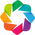

In [16]:
import numpy as np
import geoviews as gv
import holoviews as hv
import geoviews.tile_sources as gts
from holoviews.operation.datashader import rasterize
from datashader import mean
gv.extension('bokeh')

In [17]:
min_lat, max_lat = -68.5, -67.0
min_lon, max_lon = -66.5, -66.0

mask = (lat >= min_lat) & (lat <= max_lat) & (lon >= min_lon) & (lon <= max_lon)
subset_idx = np.where(mask)[0]
# calculate the chunks etc.

v6_chunk_items = 10_000
v6_chunk_size = 0.035

v7_chunk_items = 100_000
v7_chunk_size = 0.35

v6_total_chunks_requested = round(len(subset_idx) / v6_chunk_items, 0)
v7_total_chunks_requested = round(len(subset_idx) / v7_chunk_items, 0)

print(f"V6 stats: \n ~total bytes requested: {round(v6_total_chunks_requested*v6_chunk_size, 2)} MB in {int(v6_total_chunks_requested)} requests")

print(f"V7 stats: \n ~total bytes requested: {round(v7_total_chunks_requested*v7_chunk_size, 2)} MB in {int(v7_total_chunks_requested)} requests")

V6 stats: 
 ~total bytes requested: 16.73 MB in 478 requests
V7 stats: 
 ~total bytes requested: 16.8 MB in 48 requests


So in the best case, if the data we need is contiguous in the file we just need 2 or 3 requests since our page size is 8MB.

The real overhead comes from how many request (over the network) we need to build our dataframe, for v6 that's **at least 478**, hence the ~30 minutes to access time when we are out of region. 

### 3.1. The HDF5 file format

<img src="https://nsidc.github.io/cloud-optimized-icesat2/figures/figure-1.png" width="50%">

Cloud optimized HDF5

* Metadata consolidation: (file descriptors are contiguous) 
* Fix data bining (page aggregation)

<img src="https://nsidc.github.io/cloud-optimized-icesat2/figures/figure-3.png" width="50%">


In [18]:
%%time 

ds_spatial = ds_optimized.isel(delta_time=subset_idx)
# medium and high confidence photons
signal_mask = ds_spatial["signal_class_ph"].isin([3, 4])
signal_idx = np.where(signal_mask)[0]

ds_ground = ds_spatial.isel(delta_time=signal_idx)
ds_ground

CPU times: user 1.96 s, sys: 618 ms, total: 2.58 s
Wall time: 4.13 s


<xarray.Dataset> Size: 1MB
Dimensions:          (delta_time: 28737, ds_surf_type: 5)
Coordinates:
  * delta_time       (delta_time) datetime64[ns] 230kB 2018-11-20T18:31:13.48...
    lat_ph           (delta_time) float64 230kB -68.01 -68.01 ... -67.14 -67.14
    lon_ph           (delta_time) float64 230kB -66.0 -66.0 ... -66.27 -66.27
Dimensions without coordinates: ds_surf_type
Data variables:
    dist_ph_across   (delta_time) float32 115kB ...
    dist_ph_along    (delta_time) float32 115kB ...
    h_ph             (delta_time) float32 115kB ...
    pce_mframe_cnt   (delta_time) uint32 115kB ...
    ph_id_channel    (delta_time) uint8 29kB ...
    ph_id_count      (delta_time) uint8 29kB ...
    ph_id_pulse      (delta_time) uint8 29kB ...
    quality_ph       (delta_time) int8 29kB ...
    signal_class_ph  (delta_time) int8 29kB 3 3 3 3 3 4 4 4 ... 3 3 4 4 4 3 4 4
    signal_conf_ph   (delta_time, ds_surf_type) int8 144kB ...
    weight_ph        (delta_time) uint16 57kB ...
Attributes:
    data_rate:    Data are stored at the photon detection rate.
    description:  Contains arrays of the parameters for each received photon.

### 3.2 Fetching the data

In [19]:
%%time

df = ds_ground[['lat_ph', 'lon_ph', 'h_ph', 'delta_time']].to_dataframe().dropna()
df_track = df.sort_values(by='delta_time').copy()

CPU times: user 2.68 s, sys: 59.8 ms, total: 2.74 s
Wall time: 6.47 s


In [47]:
sample_percentage = 0.5 # downscaling
window_size = 50
raster_sampling=0.02
chart_w_pixels = 1200
chart_h_pixels = 500

df_subsampled = df_track.sample(frac=sample_percentage, random_state=42).sort_values(by='delta_time').copy()
df_subsampled['h_ph_smoothed'] = df_subsampled['h_ph'].rolling(window=window_size, center=True).mean()
df_subsampled.dropna(subset=['h_ph_smoothed'], inplace=True)

points_map_base = gv.Points(df, kdims=['lon_ph', 'lat_ph'], vdims=['h_ph', 'delta_time'])
raster_map_element = rasterize(points_map_base, aggregator=mean('h_ph'), x_sampling=raster_sampling, y_sampling=raster_sampling).opts(
    cmap='Viridis', 
    colorbar=True,  
    alpha=1.0
)

map_plot = (gts.CartoLight.opts(alpha=0.8) *
            gv.WMTS("https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer/tile/{Z}/{Y}/{X}").opts(alpha=0.9) *
            gv.WMTS("https://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base/MapServer/tile/{Z}/{Y}/{X}").opts(alpha=0.8) *
            raster_map_element
).opts(
    width=chart_width_pixels, height=chart_h_pixels,
    tools=['hover', 'wheel_zoom', 'pan'],
    title="ATL03 Rasterized Photon Heights (Geographic)"
)


points_alongtrack_raster = hv.Points(df_subsampled, kdims=['lat_ph', 'h_ph_smoothed'])
alongtrack_plot_smoothed = rasterize(points_alongtrack_raster, aggregator=mean('h_ph_smoothed')).opts(
    cmap='Viridis_r', 
    colorbar=True,
    alpha=0.6,
    width=chart_width_pixels, height=int(chart_h_pixels/2),
    xlabel='Latitude',
    ylabel='Smoothed Photon Height (h_ph)',
    title=f'Rasterized Along-Track (Subsampled {sample_percentage*100}%, Smoothed Window={window_size})',
    tools=['hover', 'wheel_zoom', 'pan'],
    shared_axes=False
)

layout = hv.Layout([map_plot, alongtrack_plot_smoothed]).cols(1).opts(
    merge_tools=False,
    width=int(0.6 * 1000),
    sizing_mode='scale_width' 
)
layout

:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .WMTS.I   :WMTS   [Longitude,Latitude]
         .WMTS.II  :WMTS   [Longitude,Latitude]
         .WMTS.III :WMTS   [Longitude,Latitude]
         .Image.I  :Image   [lon_ph,lat_ph]   (lon_ph_lat_ph h_ph)
   .DynamicMap.II :DynamicMap   []
      :Image   [lat_ph,h_ph_smoothed]   (lat_ph_h_ph_smoothed h_ph_smoothed)

### 3.3 Recap:

Total time to science (ATL03 V6, single gronudtrack 7GB file, out-of-region access):

* Data search: 2 seconds
* Data access: 10 to 40 minutes
* Fetching coordinates: ~3 minutes
* Subsetting: 30 seconds

Total: **~30 minutes**

Total time to science (ATL03 V7, single gronudtrack 7GB file, out-of-region access):

* Data search: 2 seconds
* Data access: 14 seconds
* Fetching coordinates: 2 minutes
* Subsetting: 10 seconds

Total: **~3 minutes**

### 3.4 The Future: Cloud Optimized HDF5 + Virtual Data Stores

Powered by cloud optimized HDF5/NetCDF, we should explore the possibility of producing virtual data collections that will enable researchers more cloud-native access patterns. In practice this means aggregating the file level metadata into a collection level metadata file in a format that can be read by other file drivers, e.g. Zarr, Icechunk. Work is underway at NSIDC and the broader earthaccess community to accomplish this goal in the next year.


## 4. Credits



|Contributors           |                      |                      |                      |
|-----------------------|----------------------|----------------------|----------------------|
| Luis Lopez            | Amy Steiker          | Rachel Wegener       | Alex Mandel          |
| Aleksandar Jelenak    | Andy Barrett         | JP Swinski           | Wei Ji Leong         |
| Jeffrey E. Lee        | Aimee Barciauskas    | Jonathan Markel      | Tyler Sutterley      |
| Suman Shekhar         | Alex Lewandowski     |                      | **Many more**...     |


<center><img src="https://i.postimg.cc/nzmV9J1w/uwhackweek.png" width="60%"/></center>




## 5. References:

* Evaluating Cloud-Optimized HDF5 for NASA’s ICESat-2 Mission: https://nsidc.github.io/cloud-optimized-icesat2/
* Pangeo showcase, HDF5 at the speed of Zarr: https://discourse.pangeo.io/t/pangeo-showcase-hdf5-at-the-speed-of-zarr/4084
* HDF in the Cloud: https://matthewrocklin.com/blog/work/2018/02/06/hdf-in-the-cloud
* Cloud-Optimized HDF5 Files – Aleksandar Jelenak, The HDF Group: https://www.youtube.com/watch?v=bDH59YTXpkc
* Cloud-Optimized HDF/NetCDF: https://guide.cloudnativegeo.org/cloud-optimized-netcdf4-hdf5/
* Fundamentals: What is Cloud-Optimized Scientific Data? https://earthmover.io/blog/fundamentals-what-is-cloud-optimized-scientific-data